## LangGraph Graph API

In [2]:
from typing_extensions import TypedDict
from typing import Annotated
from operator import add

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.types import Command

from langchain.messages import AnyMessage, HumanMessage, AIMessage



In [3]:
class SimpleState(TypedDict):
    # add_messages ayuda a gestionar listas de mensajes (append/updates) de forma segura
    messages: Annotated[list[AnyMessage], add_messages]
    extra_field: int


In [4]:
def hello_node(state: SimpleState):
    # devolvemos solo el update, no hace falta devolver todo el state
    return {
        "messages": [AIMessage("Hola! Soy un nodo de LangGraph.")],
        "extra_field": 10
    }

In [8]:
builder = StateGraph(SimpleState)
builder.add_node("hello_node", hello_node)
builder.add_edge(START, "hello_node")
builder.add_edge("hello_node", END)

graph = builder.compile()  # hay que compilar antes de usar :contentReference[oaicite:9]{index=9}

result = graph.invoke({"messages": [HumanMessage("Hi!")], "extra_field": 0})
result

{'messages': [HumanMessage(content='Hi!', additional_kwargs={}, response_metadata={}, id='3d3a8088-d34c-4440-8ca1-9ab12d9d81fd'),
  AIMessage(content='Hola! Soy un nodo de LangGraph.', additional_kwargs={}, response_metadata={}, id='5050ba18-a208-4e3e-8e0e-080f2a4566d5', tool_calls=[], invalid_tool_calls=[])],
 'extra_field': 10}

In [9]:
for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

Hi!
================================== Ai Message ==================================

Hola! Soy un nodo de LangGraph.


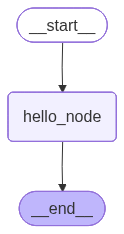

In [10]:
# PNG (si tienes IPython)
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))
